## Tarea 2
#### Fernando Morales B85338
#### Descripción del problema

El problema a tratar es poder determinar si se puede predecir si el día próximo a cierto día va a llover o no, teniendo ciertas condiciones de los días anteriores. Se tiene la variable *RainTomorrow*, que es la que se quiere predecir si será *yes* o *no*. El enfoque que será utilizado es más como un problema de clasificación, ya que mi variable de respuesta es **categórica**, por lo que siento que este enfoque al problema puede llegar a ser más intuitivo.

#### Exploración de datos

Inicialmente, para explorar los datos, se hará uso de las siguientes técnicas:

- Estadística descriptiva: es una técnica que plantea revisar, para las columnas que lo permitan, un resumen de 5 números: mínimo, primer cuartil, mediana, tercer cuartil y el máximo.
- Visualización: es una técnica que permite observar diferentes comportamientos a través de material visual, sean gráficos de todo tipo, imágenes que ayuden a explicar el set de datos, entre otros.

Teniendo en cuenta esto, empezaremos cargando el *dataset*, para ver la forma de los datos y el set de datos en general:

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# cargar data original
csv_path = './weatherAUS.csv'

df = pd.read_csv(csv_path)

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Podemos observar como, en ambas ejecuciones, existen datos vacíos que pueden resultar ser no deseados para esta investigación. Al mismo tiempo, en la primer tabla, podemos ver que existen 6 variables categóricas:

1. Location
2. WindGustDir
3. WindDir9am
4. WindDir9pm
5. RainToday
6. RainTomorrow

Mientras que todas las demás son numéricas, aunque varían bastante en sus rangos. Se puede observar como existe la posibilidad de que haya gran cantidad de *outliers* en las variables numéricas, ya que la distancia entre los máximos y mínimos y el rango intercuartil puede ser mucha, sobre todo para las siguientes variables:

1. Rainfall
2. Evaporation
3. WindSpeed9am
4. WindSpeed3pm

Para verificar esto, vamos a visualizar las variables usando *boxplots*, ya que nos permiten observar fácilmente la cantidad de *outliers*:

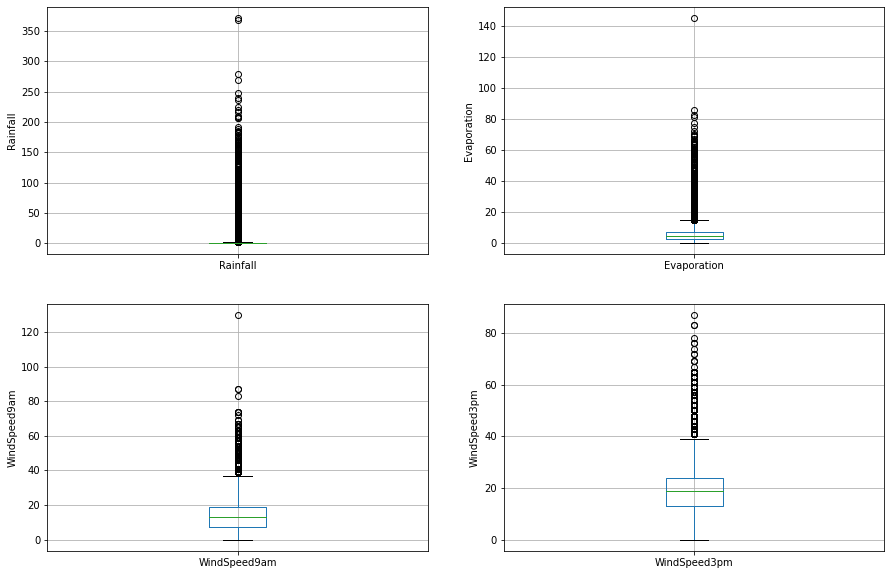

In [14]:
plt.figure(figsize=(15,10))

def draw_boxplot(column_name, position):
    plt.subplot(2,2,position)
    fig = df.boxplot(column=column_name)
    fig.set_ylabel(column_name)

draw_boxplot('Rainfall',1)
draw_boxplot('Evaporation',2)
draw_boxplot('WindSpeed9am',3)
draw_boxplot('WindSpeed3pm',4)


Teniendo esto en cuenta, a la hora de limpiar y transformar los datos, tendremos que usar la regla de 1.5IQR para remover esta gran cantidad de *outliers*. Finalmente, es muy útil poder observar las diferentes correlaciones en el set de datos, para así poder entender cómo interactuan las diferentes columnas entre sí.

In [16]:
correlation = df.corr()
correlation

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


Para que visualmente se vea mejor y se entienda más fácilmente, se usa un mapa de calor:

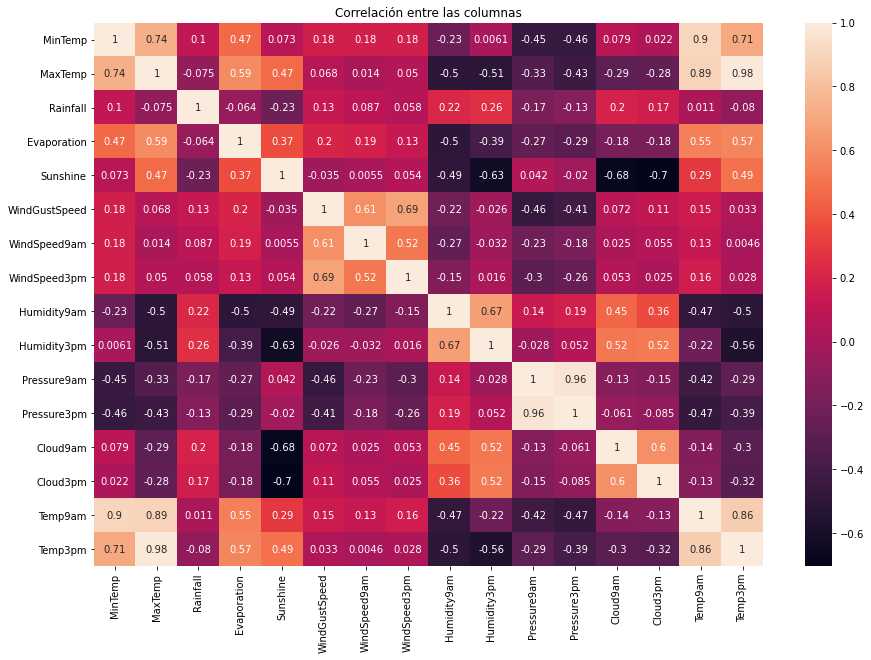

In [22]:
plt.figure(figsize=(15,10))
plt.title('Correlación entre las columnas')
fig = sns.heatmap(correlation, annot=True)       
plt.show()

Podemos observar cómo tenemos todo tipo de correlaciones: la columna `Temp9am` tiene una correlación muy fuerte con `MinTemp` y con `MaxTemp`, al igual que `Pressure3pm` con `Pressure9am`, mientras que la columna `Sunshine` tiene las correlaciones más bajas con `Cloud3pm`, `Cloud9am` y `Humidity3pm`. 
Si fuera el caso, se podría reducir la cantidad de variables simplificando el *dataset*, eliminando las variables con fuertes correlaciones entre sí.


#### Técnicas de preprocesamiento y limpieza de datos

Para la parte del procesamiento y limpieza de datos, se utilizó la herramienta `OpenRefine`. Con esta se realizaron los siguientes pasos en este ámbito:

1. Se removieron todas las filas que no tuvieron ningún tipo de información, excepto por la fecha y la locación. En total, fueron 187 filas. 
2. Se convirtieron todas las variables numéricas a tipo numérico, para poder así manipularlas y visualizarlas más fácilmente.

El historial de estos cambios puede ser visto en el archivo `operations.json`. Para esta parte, se realizaron un total de 17 operaciones. 



#### Técnicas de transformación de datos, selección y extracción de atributos

Para esta sección, se llevarán a cabo cinco operaciones importantes:

##### 1. División de la columna `Date` en tres columnas distintas: `Year`, `Month` y `Day`.

Al igual que para la parte de preprocesamiento y limpieza de datos, se utilizó la herramienta `OpenRefine`. Para llevar a cabo esta operación, se partió la columna en tres columnas nuevas a través del separador `-`. Luego, fue cuestión de renombrar las columnas correspondientes a `Year`, `Month` y `Day`. 

##### 2. Transformación numérica para columnas `RainToday` y `RainTomorrow`

Al igual que para la operación previa, se usó la herramienta `OpenRefine`. Para ambas columnas, se puso un `0` en caso de que el valor de la celda fuera `No` y un `1` en caso de que el valor de la celda fuera `Yes`.

El historial de estos cambios puede ser visto en el archivo `operations.json`. Para esta parte, se realizaron un total de 6 operaciones, las cuales son las últimas 6 operaciones que se pueden observar en el archivo.



In [208]:
# cargamos el dataset limpio y con las nuevas columnas y los nuevos valores de RainToday y RainTomorrow

csv_path_clean = './weatherAUS_clean.csv'

df_clean = pd.read_csv(csv_path_clean)

df_clean

,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,1,Albury,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008,12,2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008,12,3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008,12,4,Albury,9.2,28.0,0.0,NaN,NaN,NE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008,12,5,Albury,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145268,2017,6,21,Uluru,2.8,23.4,0.0,NaN,NaN,E,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145269,2017,6,22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145270,2017,6,23,Uluru,5.4,26.9,0.0,NaN,NaN,N,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
145271,2017,6,24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0



##### 3. Rellenar valores vacíos para tanto variables categóricas como numéricas

Viendo que existen más de 60000 filas de datos con una o más celdas faltantes, se rellenarán las celdas vacías utilizando las medianas de las variables numéricas y los valores más repetidos en las variables categóricas. Esto permitirá que no se pierda información relevante, a pesar de que le falten celdas de información a las filas. Esta idea fue propuesta por la siguiente [guía](https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling) creada por Prashant Banerjee.

In [209]:
# conseguimos las variables numéricas
numerical = [col for col in df_clean.columns if df_clean[col].dtypes != 'O']

# conseguimos las variables categóricas

categorical = [col for col in df_clean.columns if df_clean[col].dtypes == 'O']

# rellenamos las variables numéricas usando la mediana de cada una de las columnas
for column in numerical:
    median = df_clean[column].median()
    df_clean.fillna(median, inplace=True)
    
# rellenamos las variables categóricas usando el valor más común para cada una de las columnas
for col in categorical:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace= True)


##### 4.  Usar la regla de 1.5IQR para eliminar gran cantidad de *outliers*

Ya que para las 4 columnas numéricas previamente mencionadas existe una gran cantidad de *outliers*, se aplicará la regla de 1.5 IQR para eliminar gran parte de ellos.

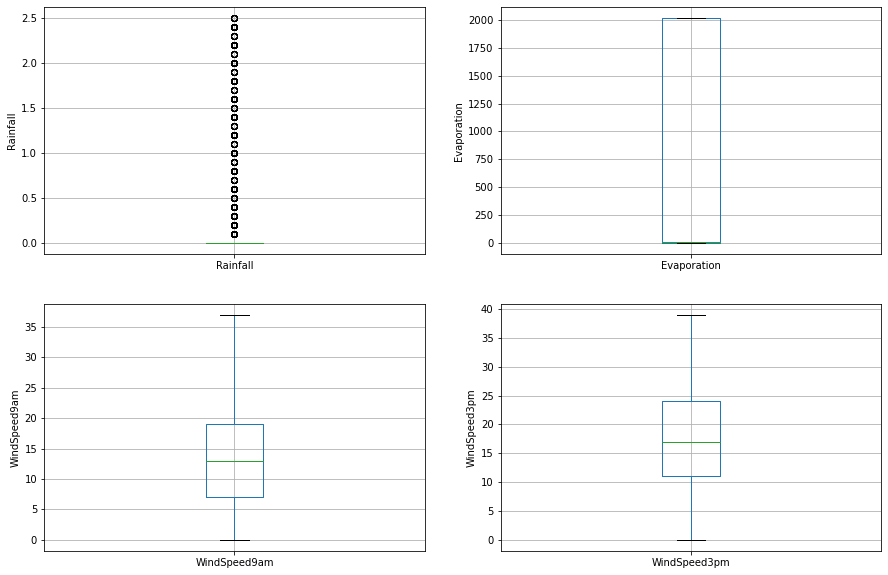

In [210]:
def iqr(df, column):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - 1.5*iqr) & (df[column] <= q3 + 1.5*iqr)
    return df.loc[filter] 

df_clean_1 = iqr(df_clean, 'Rainfall')
df_clean_2 = iqr(df_clean_1, 'Evaporation')
df_clean_3 = iqr(df_clean_2, 'WindSpeed9am')
df_clean_4 = iqr(df_clean_3, 'WindSpeed3pm')

plt.figure(figsize=(15,10))

def draw_boxplot_clean(column_name, position):
    plt.subplot(2,2,position)
    fig = df_clean_4.boxplot(column=column_name)
    fig.set_ylabel(column_name)

draw_boxplot_clean('Rainfall',1)
draw_boxplot_clean('Evaporation',2)
draw_boxplot_clean('WindSpeed9am',3)
draw_boxplot_clean('WindSpeed3pm',4)


##### 5. Separar datos en *sets* de entrenamiento como de testeo y separar la variable de respuesta

In [242]:
X = df_clean_4.drop(['RainTomorrow'], axis=1)

y = df_clean_4['RainTomorrow']
# split X and y into training and testing sets
            
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### 6. Hacer *encode* para las variables categóricas

En el *dataset*, nos quedan restantes las variables `Location`, `WindGustDir`, `WindDir9am` y `WindDir9pm` como categóricas, por lo que tenemos que transformarlas a numéricas para poder procesarlas en los modelos. Para eso, se va a utilizar la librería `category_encoders`.

In [211]:
# instalando la librería
!pip install category_encoders

In [243]:
# haciendole encode a todas las variables de tipo str

import category_encoders as ce

encoder = ce.OneHotEncoder()

X = encoder.fit_transform(X)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

print(X.shape)
print(X_train.shape)
print(X_test.shape)


(90857, 120)
(22715, 120)
(113572, 120)


##### 7. Hacer un escalado para las variables numéricas

Este paso se realiza para tener a todas las variables en la escala del 0 al 1. Se utilizará la librería `sklearn.preprocessing` con su clase `MinMaxScaler` para este fin.

In [244]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.transform(X)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Finalmente, ya tenemos el *dataset* completamente preparado para realizar e implementar los algoritmos de aprendizaje.

#### Uso de algoritmos de aprendizaje mecánico

Para esta tarea los siguientes dos modelos serán utilizados para poder predecir la variable `RainTomorrow`: *`RandomForest`* y *`Extreme Gradient Boost`*. Inicialmente, se probarán ambos con los hiperparámetros por defecto para no tener ninguna interferencia con el modelo. Una vez que se tenga los resultados del primer modelo, se escogerá el modelo cuyo rendimiento fuese mejor para evaluarlo y mejorarlo. 

##### 1. RandomForest

In [246]:
# random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model,X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.871 (0.002)


Se puede observar como el *performance* del modelo usando *RandomForest* fue de 87.1% con una desviación estándar de 0.2, lo cual es bastante consistente. 

##### 2.Extreme Gradient Boost


In [247]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define the model
model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.875 (0.002)


Por otro lado, usando el algoritmo de *Extreme Gradient Boost*, podemos obsercar como fue ligeramente mejor que el *Random Forest*, ya que el *performance* de este algoritmo fue de 87.5% con la misma desviación estándar que el algoritmo previo. Teniendo en cuenta esto, se utilizará *Extreme Gradient Boost* para intentar maximizar y encontrar los hiperparámetros ideales.

#### Uso de técnicas de evaluación de modelos

Las siguientes dos técnicas de evaluación y mejora predictiva de los modelos será utilizados:

##### 1. Explorar la cantidad de features usados para cada modelo
##### 2. Explorar la cantidad de samples para cada modelo

Estas dos técnicas serán utilizadas, usando *RepeatedStratifiedKFold*, para encontrar los valores de los hiperparámetros que permite tener el máximo porcentaje de rendimiento de los 
Vamos a estar utilizando tanto el *RandomForest* como *Extreme Gradient Boost*, ya que las diferencias entre ambos modelos son relativamente pequeñas, por lo que es posible que ajustando hiperparámetros, una fácilmente sobrepase a la otra. Teniendo esto, los posibles valores para los hiperparámetros serán:

- Features
    - [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
- Samples
    - [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [255]:
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models_XGB = dict()
    for sample_size in arange(0.1, 1.1, 0.1):
        for feature_size in arange(0.1, 1.1, 0.1):
            key = '%.1f' % sample_size
            models_XGB[str(str(key)+ ',' + str(feature_size))] = XGBClassifier(subsample=sample_size,colsample_bytree=feature_size)
    return models_XGB

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

models_XGB = get_models()
results, names = list(), list()
for name, model in models_XGB.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison


>0.1,0.1 0.860 (0.003)
>0.1,0.2 0.862 (0.003)
>0.1,0.30000000000000004 0.861 (0.003)
>0.1,0.4 0.861 (0.002)
>0.1,0.5 0.860 (0.003)
>0.1,0.6 0.860 (0.003)
>0.1,0.7000000000000001 0.860 (0.003)
>0.1,0.8 0.859 (0.003)
>0.1,0.9 0.859 (0.003)
>0.1,1.0 0.859 (0.003)
>0.2,0.1 0.865 (0.002)
>0.2,0.2 0.866 (0.003)
>0.2,0.30000000000000004 0.866 (0.003)
>0.2,0.4 0.867 (0.002)
>0.2,0.5 0.867 (0.002)
>0.2,0.6 0.867 (0.002)
>0.2,0.7000000000000001 0.867 (0.003)
>0.2,0.8 0.867 (0.003)
>0.2,0.9 0.867 (0.003)
>0.2,1.0 0.867 (0.003)
>0.3,0.1 0.867 (0.002)
>0.3,0.2 0.869 (0.003)
>0.3,0.30000000000000004 0.870 (0.003)
>0.3,0.4 0.869 (0.003)
>0.3,0.5 0.870 (0.003)
>0.3,0.6 0.870 (0.003)
>0.3,0.7000000000000001 0.870 (0.002)
>0.3,0.8 0.870 (0.002)
>0.3,0.9 0.870 (0.003)
>0.3,1.0 0.870 (0.003)
>0.4,0.1 0.868 (0.003)
>0.4,0.2 0.870 (0.002)
>0.4,0.30000000000000004 0.871 (0.003)
>0.4,0.4 0.872 (0.002)
>0.4,0.5 0.872 (0.003)
>0.4,0.6 0.872 (0.003)
>0.4,0.7000000000000001 0.872 (0.003)
>0.4,0.8 0.872 (0.003)
>0

##### Nested Cross-Validation

Finalmente, para realizar las pruebas correspondientes al modelo y asegurarnos que se está probando de la mejor forma posible, se usará *Nested Cross-Validation* para revisar si existe la posibilidad de aumentar el *performance* dependiendo del tipo de validación que se realice. Este código fue inspirado en la siguiente [guía](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/#:~:text=Nested%20cross%2Dvalidation%20is%20an,of%20overfitting%20the%20training%20dataset.&text=Typically%2C%20the%20k%2Dfold%20cross,model%20on%20the%20holdout%20fold.).
Para este caso, me enfoqué en el *learning rate* y la cantidad máxima de *features*, para así ver si los resultados variaban y poder abarcar la máxima cantidad de hiperparámetros posible.


In [259]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model_nested = XGBClassifier(random_state=1)

space = dict()
space['rates'] = [0.0001, 0.001, 0.01, 0.1,0.5 ,1.0]
space['max_features'] = range(1,11)
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores_nested = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_nested), std(scores_nested)))

Accuracy: 0.875 (0.003)


In [303]:
scores_nested

array([0.87665082, 0.87075189, 0.88165889, 0.87170908, 0.87575944,
       0.87769657, 0.87461478, 0.87716827, 0.87241349, 0.87575944])

Desafortunadamente, la precisión promedio evaluando los diferentes rangos de cantidad máxima de *features* y de *learning rate*.  

#### Resultados

Como podemos observar en el siguiente gráfico, donde el eje **y** constituye a todas las corridas de los modelos y el eje **x** su promedio, la media para la efectividad del modelo va logarítmicamente aumentando, a pesar de que se pueden ver ciertos *outliers*.

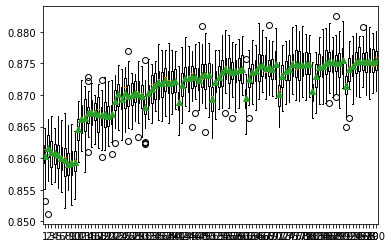

In [260]:
pyplot.boxplot(results, showmeans=True)
pyplot.show()

Agarraremos el primero de los resultados, el del medio y el último para entender mejor los resultados y cómo los hiperparámetros influyen en la precisión de cada uno de los modelos generados.

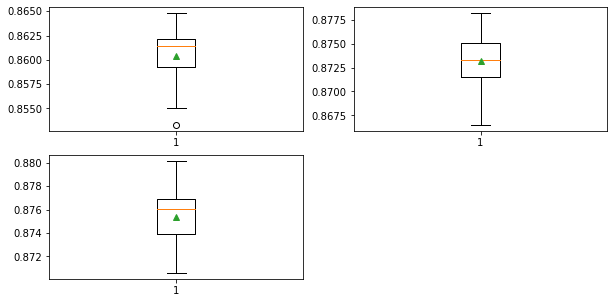

In [309]:
plt.figure(figsize=(10,5))
def draw_boxplot_comparison(column_name, position):
    plt.subplot(2,2,position)
    pyplot.boxplot(results[column_name], showmeans=True)

draw_boxplot_comparison(0,1)
draw_boxplot_comparison(49,2)
draw_boxplot_comparison(99,3)

pyplot.show()

En esta separación de los *boxplots*, donde el *boxplot* superior izquierdo es el primero de los resultados de los modelos, el *boxplot* superior derecho es el modelo con hiperparámetros `0.5` y `0.5`, y el *boxplot* inferior izquierdo corresponde al último modelo generado. Se puede observar como, mientras que se va aumentando los valores de ambos hiperparámetros, la precisión de los modelos generados va aumentando de toda forma: el mínimo, el máximo y la media son mayores todas a través de las iteraciones, siendo la media la máxima con el último modelo generado con hiperparámetros `1.0` y `1.0`.

Adicionalmente, se puede observar en la siguiente tabla todas las validaciones que se realizaron para cada uno de los modelos con los hiperparámetros. Podemos observar que, entre el primer y el segundo modelo, existe una diferencia bastante notable de 1%, mientras que la diferencia entre el segundo y el último modelo es relativamente pequeña.

In [281]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['0.10, 0.10', '0.50, 0.50','1, 1']),
                 cells=dict(values=[results_c[0],results_c[49],results_c[99]]))
                     ])
fig.show()

#### Atributos más importantes

Los atributos más importantes en los modelos resultantes son los siguientes:

1. `SampleSize`: como se pudo observar en uno de los primeros *boxplots*, el la cantidad y el tamaño de la muestra para el modelo es extremadamente importante, donde mientras más muestras se tenga, más preciso puede llegar a ser el modelo.
2. `FeatureSize`: similar a la variable anterior, permite encontrar correlaciones que puedan ayudar fuertemente a predecir la variable de respuesta.
3. `LearningRate`: similar a las variables anteriores, aunque permite salirse de máximos locales que comúnmente serían encontrados con una tasa de aprendizaje pequeña.

Todos estos atributos se comportan de forma muy similar a través de los algoritmos y validaciones que se vayan utilizando, donde los valores más altos permiten que el modelo haga mejores predicciones que si se tuvieran pequeños valores; estamos sacrificando velocidad por complejidad, para así convertir cada uno de los modelos en lo más precisos que pueden ser.